# Double layer NN for XOR

In [69]:
%matplotlib inline
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

## NN 2 -> 2 -> 1 fitting just 4 data points (4 quadrants)

In [70]:
# input & output
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 1st layer
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 2nd layer
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [71]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)
feed_dict={X: x_data, Y: y_data}

## Fitting

In [72]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict=feed_dict))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed_dict)
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.7379836
4000 0.38647872
8000 0.027617319
12000 0.013000652
16000 0.008423076
20000 0.006210422

Hypothesis:  [[0.00600311]
 [0.99184275]
 [0.99452436]
 [0.00512595]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


# XOR dataset from Python Machine Learning

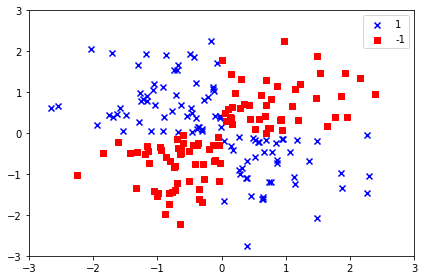

In [73]:
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_pred = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_pred, 1, -1)

plt.scatter(X_xor[y_pred == 1, 0], X_xor[y_pred == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_pred == 0, 0], X_xor[y_pred == 0, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

In [74]:
x_data = X_xor
y_data = (y_xor>0).reshape(-1,1).tolist()
feed_dict={X: x_data, Y: y_data}

## Trains the same 2 -> 2 -> 1 NN model

In [75]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    print( sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) )
    y_pred = sess.run(predicted, feed_dict={X: x_data, Y: y_data})

0 0.7305015
4000 0.46023026
8000 0.45174533
12000 0.4499272
16000 0.4488317
20000 0.44807425
0.795


### Can't fit

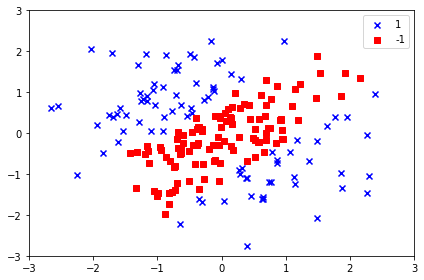

In [76]:
y_pred = np.squeeze(y_pred)

plt.scatter(X_xor[y_pred == 1, 0], X_xor[y_pred == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_pred == 0, 0], X_xor[y_pred == 0, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

## Now let's try 2 -> 3 -> 3 -> 1 NN

In [79]:
# input & output
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 1st layer
W1 = tf.Variable(tf.random_normal([2, 3]), name='weight1')
b1 = tf.Variable(tf.random_normal([3]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 2st layer
W2 = tf.Variable(tf.random_normal([3, 3]), name='weight2')
b2 = tf.Variable(tf.random_normal([3]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# 3nd layer
W3 = tf.Variable(tf.random_normal([3, 1]), name='weight3')
b3 = tf.Variable(tf.random_normal([1]), name='bias3')
hypothesis = tf.sigmoid(tf.matmul(layer2, W3) + b3)

# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [80]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    print( sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) )
    y_pred = sess.run(predicted, feed_dict={X: x_data, Y: y_data})

0 1.0599269
4000 0.6059752
8000 0.18207191
12000 0.062594675
16000 0.0369588
20000 0.024818217
1.0


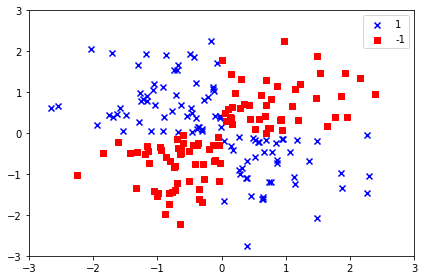

In [81]:
y_pred = np.squeeze(y_pred)
plt.scatter(X_xor[y_pred == 1, 0], X_xor[y_pred == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_pred == 0, 0], X_xor[y_pred == 0, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

## Keras Example

In [61]:
import tensorflow as tf
import tensorflow.contrib.keras as keras
# If error, make update `dask` package in conda
# conda upgrade dask
# conda install tornado=4.5.3

In [87]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        input_dim=2,
        units=3,  
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(keras.layers.Dense(input_dim=3,units=3,activation='tanh'))
model.add(keras.layers.Dense(input_dim=3,units=1,activation='sigmoid'))

#adam_optimizer = keras.optimizers.Adam(lr=0.1)
#model.compile(optimizer=adam_optimizer, loss='binary_crossentropy')
model.compile(optimizer='adam', loss='binary_crossentropy')

In [89]:
history = model.fit(x_data, np.squeeze(y_data),
                    batch_size=10, epochs=200,
                    verbose=0, validation_split=0.1)

In [90]:
y_pred = model.predict_classes(x_data, verbose=0)
correct_preds = np.sum(y_pred == y_data, axis=0) 
sum(correct_preds)/200

0.945

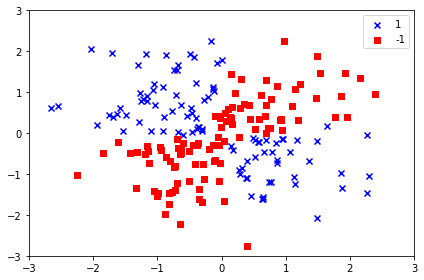

In [91]:
y_pred = np.squeeze(y_pred)
plt.scatter(X_xor[y_pred == 1, 0], X_xor[y_pred == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_pred == 0, 0], X_xor[y_pred == 0, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()